### k-means with sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [ ]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

In [ ]:
Kmean.inertia_

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(2.12774016, 1.9226315, s=200, c='g', marker='s')
plt.scatter(-0.96222955, -0.88319138, s=200, c='r', marker='s')
plt.show()

In [ ]:
Kmean.labels_

In [ ]:
sample_test = np.array([-3.0,-3.0])
second_test = sample_test.reshape(1, -1)
Kmean.predict(second_test)

### k-means without sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('../data/clustering.csv')
data.head(3)

In [ ]:
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(3)

In [ ]:
X = data.values

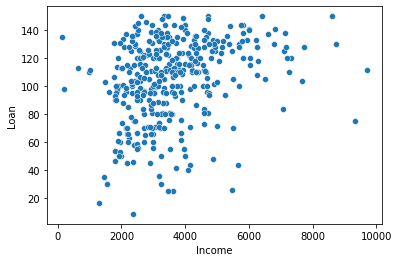

In [5]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [6]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [26]:
data.sample(n=4).values

array([[2620.,  150.],
       [2167.,  115.],
       [3333.,   99.],
       [3200.,   70.]])

In [27]:
pd.DataFrame(X).groupby(by=alma).mean().values

array([[4871.10588235,  114.02352941],
       [3404.71428571,  104.07792208],
       [2211.35      ,   96.71666667],
       [7281.31818182,  121.54545455]])

In [25]:
np.count_nonzero(data.sample(n=4).values-pd.DataFrame(X).groupby(by=alma).mean().values)

8

In [16]:
alma = 0

def kmeans(X, k):
    global alma

    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values

    while diff:
        # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist of the point from all centroids

            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid

                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx

        alma = cluster
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave

        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0

        else: centroids = new_centroids

    return centroids, cluster

In [35]:
list(pd.DataFrame(X).groupby(by=alma))[0][1]

,0,1
0,4583.0,128.0
3,6000.0,141.0
9,4950.0,125.0
12,4887.0,133.0
18,4226.0,110.0
...,...,...
353,5800.0,132.0
354,4467.0,120.0
370,4750.0,94.0
376,5703.0,128.0


In [8]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

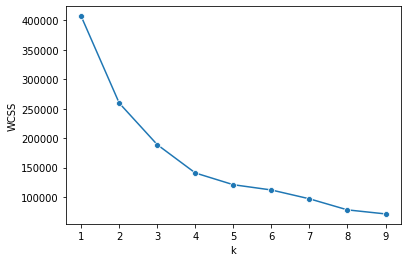

In [9]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [17]:
k = 4
centroids, cluster = kmeans(X, k)

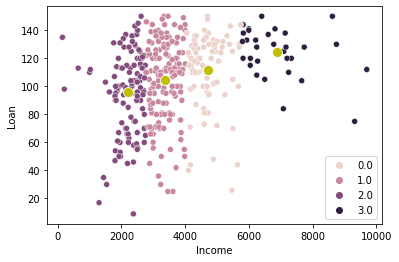

In [11]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:, 0], centroids[:, 1], s=100, color='y')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()